Welcome to my solution to DigitRecognition assignment from kaggle(https://www.kaggle.com/competitions/digit-recognizer/overview). This is the second part of my traveling in MNIST dataset, but this time I want to explore Clustering algorithms, which are definitely suit more to this dataset. Let's start with loading data

In [48]:
import sys
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd

PROJECT_ROOT_DIR = os.path.dirname(os.getcwd())

def load_data(project_root_dir=PROJECT_ROOT_DIR):
    csv_path_test = os.path.join(PROJECT_ROOT_DIR, "data/test.csv")
    csv_path_train = os.path.join(PROJECT_ROOT_DIR, "data/train.csv")
    return pd.read_csv(csv_path_test), pd.read_csv(csv_path_train)

test_set, train_set = load_data()

train_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


First of all, I want to perform data scaling, since as far as I know it might be crucial for adequate cluster distribution. According to this paper(https://www.semanticscholar.org/reader/1d352dd5f030589ecfe8910ab1cc0dd320bf600d) and many other researches, that I've been reading, Z-score normalization, also called Standard Scaling helps clustering algorithms to find better clusters and in case of one feature having much greater values than other features, prevents bigger-valued feature to dominate others. But this is not the case for us.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X, y = train_set.drop("label", axis=1), train_set["label"]
X_train, y_train = X[:60000], y[:60000]

X_train_scaled = scaler.fit_transform(X_train)

**Model Evaluation and Initialization Parameters for K-Means:**

Now is the opportune moment to evaluate our model. The K-Means algorithm requires a single mandatory argument - `n_clusters`, representing the number of clusters to be randomly or probabilistically distributed among datapoints based on their contribution to overall inertia.

Choosing the "right" number of clusters is a critical decision, and various methods exist, such as the Elbow method and Silhouette score. However, I contend that the number of clusters is inherently ambiguous, as different problems necessitate different approaches. For instance, the Elbow method might suggest 2 clusters, but we know that a minimum of 10 clusters is required. Another example comes from Andrew Ng's course on clustering, where T-shirt sizes depended on company preferences rather than the results of the Elbow method. Hence, I prefer to start with an initial assumption of 10 clusters.

Another crucial parameter is `n_init`, indicating the number of trials to initialize 10 clusters in the best possible way. By default, this value is set to `auto`, and if `init` is specified as `k-means++`, it becomes 1. However, I prefer an exhaustive approach and set it to 1000 trials to achieve the best possible result.



In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=500, init='k-means++', verbose=1)
label = kmeans.fit_predict(X_train)

Initialization complete
Iteration 0, inertia 180050947241.0.
Iteration 1, inertia 111475162929.96808.
Iteration 2, inertia 109067354116.03354.
Iteration 3, inertia 108352267552.23737.
Iteration 4, inertia 108083938343.53506.
Iteration 5, inertia 107972521133.94016.
Iteration 6, inertia 107920429516.68407.
Iteration 7, inertia 107896350177.33011.
Iteration 8, inertia 107884922903.54015.
Iteration 9, inertia 107878861932.82832.
Iteration 10, inertia 107874854980.16042.
Iteration 11, inertia 107872025673.3766.
Iteration 12, inertia 107870259484.62189.
Iteration 13, inertia 107869159468.91754.
Iteration 14, inertia 107868348638.6111.
Iteration 15, inertia 107867452240.0094.
Iteration 16, inertia 107866616187.17358.
Iteration 17, inertia 107865949563.90482.
Iteration 18, inertia 107865374137.09329.
Iteration 19, inertia 107864769343.4039.
Iteration 20, inertia 107864336548.07683.
Iteration 21, inertia 107863957541.3497.
Iteration 22, inertia 107863564616.55345.
Iteration 23, inertia 1078632

In [9]:
from sklearn.metrics import rand_score

print('Clustering score:',rand_score(y,label))

Clustering score: 0.8796252813275599


**Evaluation Metric: Rand Score**

In assessing the performance of clustering algorithms, I rely on the `rand_score` function. While `adjusted_rand_score` is an alternative, I consider the impact of random agreement negligible. For simplicity and clarity, I choose to stick with `rand_score`.

**Observations on Results:**

Upon revisiting our outcomes, it's worth noting that achieving an 87.9% accuracy is deemed suboptimal. This result can be attributed to the inherent variability of KMeans, a factor that often yields diverse outcomes. To enhance stability and reliability in clustering, I recommend embracing Hierarchical clustering, particularly the Agglomerative Clustering method. In this form of Hierarchical clustering, each point is treated as an individual cluster, contributing to increased robustness.

**Exploring Hierarchical Clustering:**

It's crucial to recognize that Hierarchical clustering offers an alternative perspective to traditional KMeans. Specifically, Agglomerative Clustering stands out for its stability and ability to handle diverse datasets. Additionally, it's worth noting the existence of the Divisive algorithm, which adopts the opposite approach to Agglomerative Clustering by commencing with a single large cluster.




In [11]:
from sklearn.cluster import AgglomerativeClustering, Birch

aggl = AgglomerativeClustering(n_clusters=10, linkage="ward")
label_a = aggl.fit_predict(X_train)

In [12]:
print('Clustering score:',rand_score(y,label_a))

Clustering score: 0.9065998566859301


That looks much better, but still not perfect. I can try gradually increasing the number of clusters from 10 to, let's say, 18, and observe how the Silhouette score changes.

- **Silhouette Score Overview:**
  - The Silhouette score, as mentioned before, serves as a means to determine the optimal number of clusters. It combines cohesion (how close each data point is to another data point in the same cluster) and separation (how far data points from different clusters are from each other).
  
- **Additional Measure: V Measure:**
  - Another measure that I intend to use in this project is the V measure, where the combination of homogeneity and completeness provides a single evaluation metric.

**Note:**
I had to decrease the value of `n_init` for faster clustering.



In [14]:
from sklearn.metrics import silhouette_score, v_measure_score

scores = [[[],[]],[[],[]]]

for i in range(10,19):
    label = KMeans(n_clusters=i, init='k-means++', n_init=100).fit_predict(X_train_scaled)
    label_a = (AgglomerativeClustering(n_clusters=i, linkage='ward')
               .fit_predict(X_train_scaled))
    k = v_measure_score(y, label)
    a = v_measure_score(y, label_a)
    scores[0][0].append(silhouette_score(X_train_scaled, label))
    scores[0][1].append(silhouette_score(X_train_scaled, label_a))
    scores[1][0].append(k)
    scores[1][1].append(a)

Maximum silhouette_score in AgglomerativeClustering is 14
Maximum silhouette_score in KMeans is 15


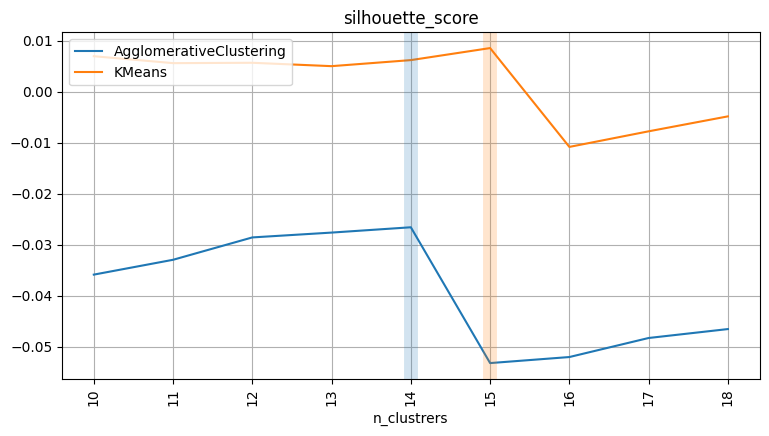

In [15]:
plt.figure(figsize=(9, 4.5))
plt.plot(range(10,19), scores[0][1], label='AgglomerativeClustering')
plt.plot(range(10,19), scores[0][0], color='C1', label='KMeans')
plt.xticks(range(10,19), rotation='vertical')
print('Maximum silhouette_score in AgglomerativeClustering is', range(10,19)[np.argmax(scores[0][1])])
print('Maximum silhouette_score in KMeans is', range(10,19)[np.argmax(scores[0][0])])
plt.axvline(range(10,19)[np.argmax(scores[0][1])], lw=10, alpha=0.2)
plt.axvline(range(10,19)[np.argmax(scores[0][0])], color='C1', lw=10, alpha=0.2)
plt.grid(True)
plt.xlabel('n_clustrers')
plt.legend(loc='upper left')
plt.title('silhouette_score')              
plt.show()

Maximum v_measure in AgglomerativeClustering is 10
Maximum v_measure in KMeans is 14


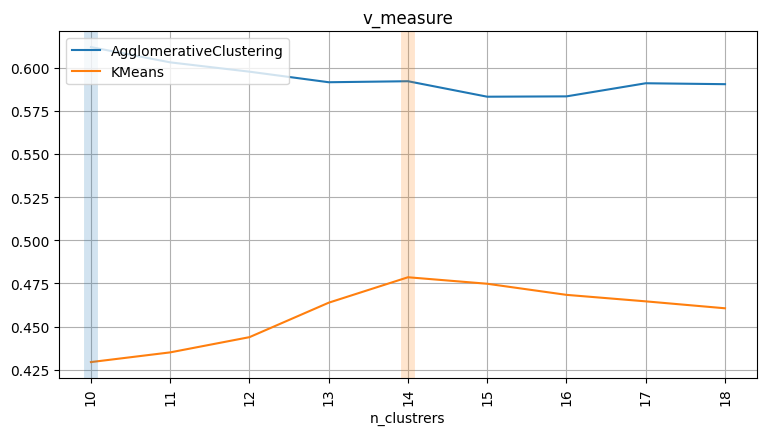

In [16]:
plt.figure(figsize=(9, 4.5))
plt.plot(range(10,19), scores[1][1], label='AgglomerativeClustering')
plt.plot(range(10,19), scores[1][0], color='C1', label='KMeans')
plt.xticks(range(10,19), rotation='vertical')
print('Maximum v_measure in AgglomerativeClustering is', range(10,19)[np.argmax(scores[1][1])])
print('Maximum v_measure in KMeans is', range(10,19)[np.argmax(scores[1][0])])
plt.axvline(range(10,19)[np.argmax(scores[1][1])], lw=10, alpha=0.2)
plt.axvline(range(10,19)[np.argmax(scores[1][0])], color='C1', lw=10, alpha=0.2)
plt.grid(True)
plt.legend(loc='upper left')
plt.xlabel('n_clustrers')
plt.title('v_measure')              
plt.show()

After 2 hours of waiting, I finally got the results. Unfortunately, they are not optimistic `silhouette_score` for both algorithms is around 0, indicating overlapping clusters or clusters with ambiguous boundaries. However, it's hard to make any conclusions about an algorithm without visualizing data. 
Next is `v_measure` that is around 0.6 for Hierarchical clustering and about 0.475 for Kmeans, which is a good balance between `homogeneity` and `completeness`, meaning a good purity of the clusters and the coverage of each true class across clusters. 
But I made a mistake by not including `homogeneity_score, completeness_score`, since now it's not possible to check where it makes mistakes. Also including `rand_score`, could be a good idea for better evaluation.
(I had to include "random_state=x" in "KMeans" to obtain the same results for the code above and below, but it already took me 2 hours, so let's assume that they are the same)

In [19]:
from sklearn.metrics import homogeneity_score, completeness_score

score_hom_com_acc = [[[],[],[]],[[],[],[]]]

for i in range(10,19):
    label = KMeans(n_clusters=i, init='k-means++', n_init=100).fit_predict(X_train_scaled)
    label_a = (AgglomerativeClustering(n_clusters=i, linkage='ward')
               .fit_predict(X_train_scaled))
    k_h = homogeneity_score(y, label)
    k_c = completeness_score(y, label)
    k_r = rand_score(y, label)
    a_h = homogeneity_score(y, label_a)
    a_c = completeness_score(y, label_a)
    a_r = rand_score(y, label_a)
    score_hom_com_acc[0][0].append(k_h)
    score_hom_com_acc[0][1].append(k_c)
    score_hom_com_acc[0][2].append(k_r)
    score_hom_com_acc[1][0].append(a_h)
    score_hom_com_acc[1][1].append(a_c)
    score_hom_com_acc[1][2].append(a_r)
    print(f"Iteration:{i-9}")

Iteration:1
Iteration:2
Iteration:3
Iteration:4
Iteration:5
Iteration:6
Iteration:7
Iteration:8
Iteration:9


Maximum v_measure in AgglomerativeClustering is 18
Maximum v_measure in KMeans is 18


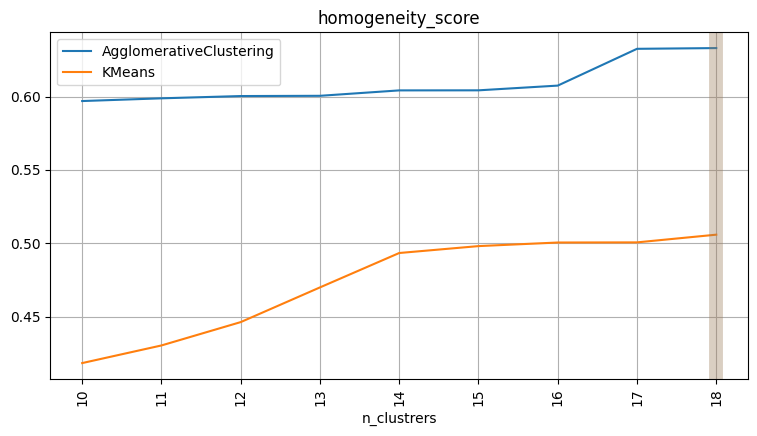

In [27]:
plt.figure(figsize=(9, 4.5))
plt.plot(range(10,19), score_hom_com_acc[1][0], label='AgglomerativeClustering')
plt.plot(range(10,19), score_hom_com_acc[0][0], color='C1', label='KMeans')
plt.xticks(range(10,19), rotation='vertical')
print('Maximum v_measure in AgglomerativeClustering is', range(10,19)[np.argmax(score_hom_com_acc[1][0])])
print('Maximum v_measure in KMeans is', range(10,19)[np.argmax(score_hom_com_acc[0][0])])
plt.axvline(range(10,19)[np.argmax(score_hom_com_acc[1][0])], lw=10, alpha=0.2)
plt.axvline(range(10,19)[np.argmax(score_hom_com_acc[0][0])], color='C1', lw=10, alpha=0.2)
plt.grid(True)
plt.legend(loc='upper left')
plt.xlabel('n_clustrers')
plt.title('homogeneity_score')              
plt.show()

Maximum v_measure in AgglomerativeClustering is 10
Maximum v_measure in KMeans is 14


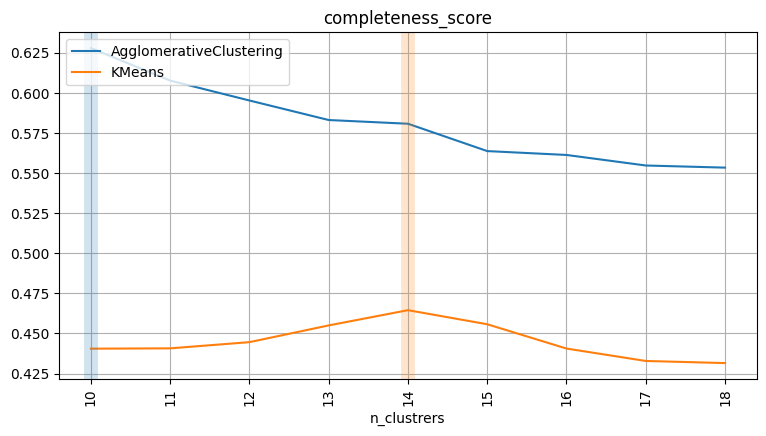

In [22]:
plt.figure(figsize=(9, 4.5))
plt.plot(range(10,19), score_hom_com_acc[1][1], label='AgglomerativeClustering')
plt.plot(range(10,19), score_hom_com_acc[0][1], color='C1', label='KMeans')
plt.xticks(range(10,19), rotation='vertical')
print('Maximum v_measure in AgglomerativeClustering is', range(10,19)[np.argmax(score_hom_com_acc[1][1])])
print('Maximum v_measure in KMeans is', range(10,19)[np.argmax(score_hom_com_acc[0][1])])
plt.axvline(range(10,19)[np.argmax(score_hom_com_acc[1][1])], lw=10, alpha=0.2)
plt.axvline(range(10,19)[np.argmax(score_hom_com_acc[0][1])], color='C1', lw=10, alpha=0.2)
plt.grid(True)
plt.legend(loc='upper left')
plt.xlabel('n_clustrers')
plt.title('completeness_score')              
plt.show()

Maximum v_measure in AgglomerativeClustering is 17
Maximum v_measure in KMeans is 18


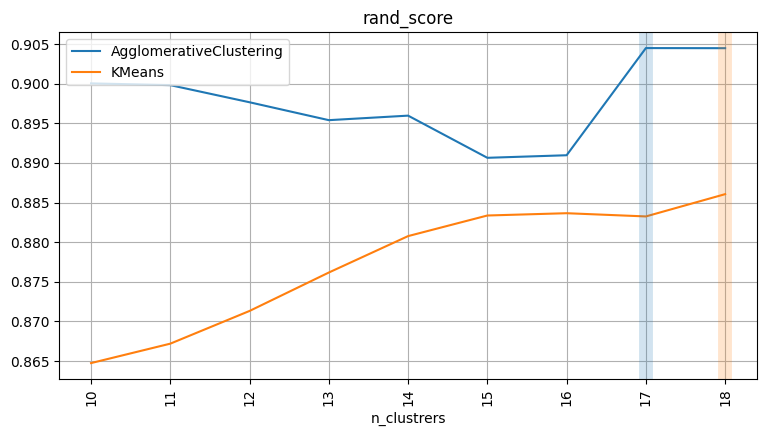

In [23]:
plt.figure(figsize=(9, 4.5))
plt.plot(range(10,19), score_hom_com_acc[1][2], label='AgglomerativeClustering')
plt.plot(range(10,19), score_hom_com_acc[0][2], color='C1', label='KMeans')
plt.xticks(range(10,19), rotation='vertical')
print('Maximum v_measure in AgglomerativeClustering is', range(10,19)[np.argmax(score_hom_com_acc[1][2])])
print('Maximum v_measure in KMeans is', range(10,19)[np.argmax(score_hom_com_acc[0][2])])
plt.axvline(range(10,19)[np.argmax(score_hom_com_acc[1][2])], lw=10, alpha=0.2)
plt.axvline(range(10,19)[np.argmax(score_hom_com_acc[0][2])], color='C1', lw=10, alpha=0.2)
plt.grid(True)
plt.legend(loc='upper left')
plt.xlabel('n_clustrers')
plt.title('rand_score')              
plt.show()

As completeness goes down with increasing in number of clusters, `homogeneity` increases as the same time, `v_measure`, that stays the same, shows the tradeoff between them, but for both algorithms it stays at approximately the same level regardless of  whatever number of clusters we pick. I believe, that 14 clusters for Kmeans and 10 for Agglomerative should for now. 

Another way of increasing performance of clustering is dimensionality reduction. TSNE algorithm is widely used for plotting high-dimensional datasets and for dimensionality reduction.

In [24]:
from sklearn.manifold import TSNE

X_train_transformed = TSNE().fit_transform(X_train_scaled)


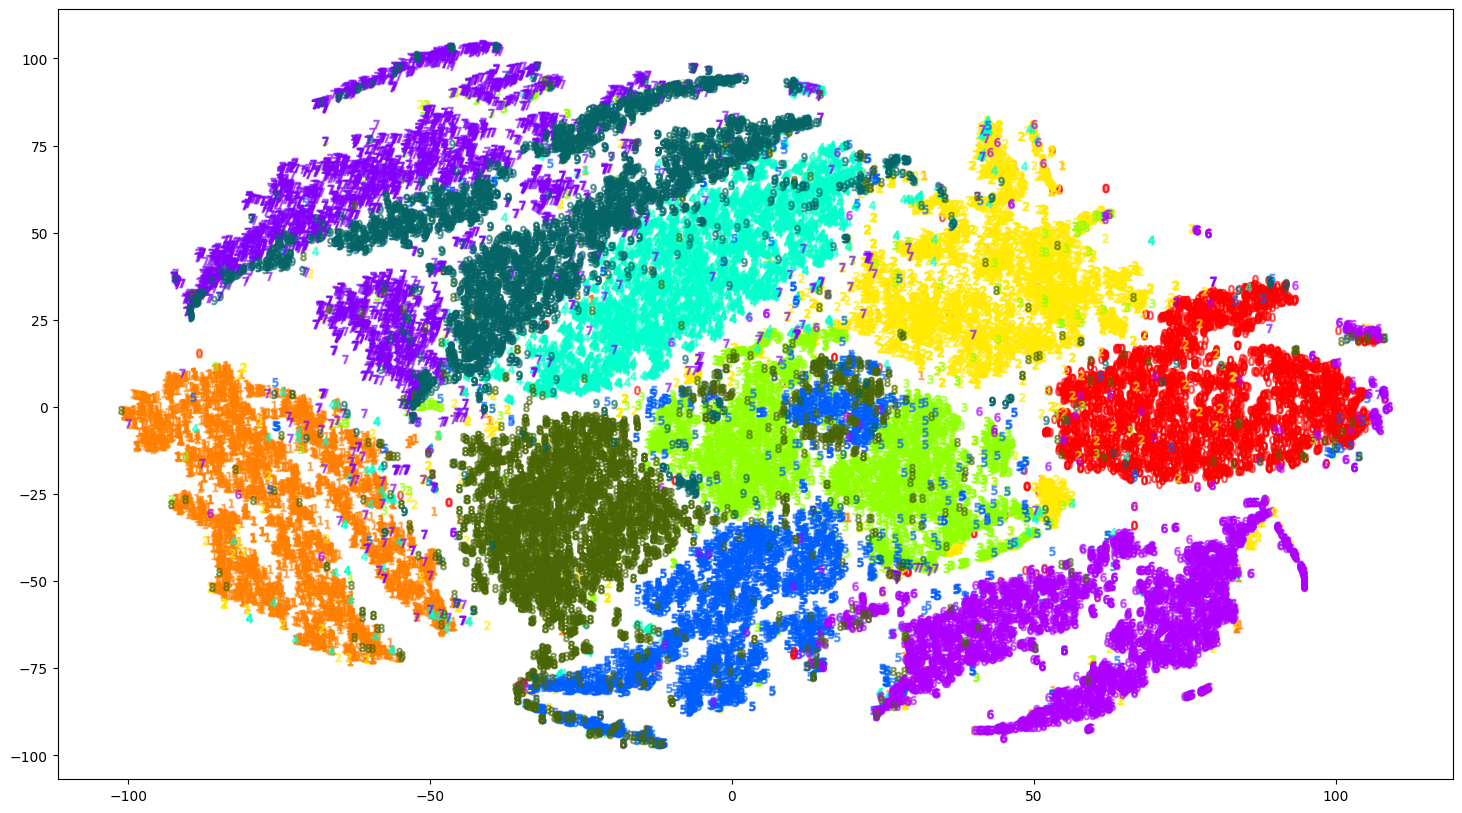

In [35]:
fig, ax = plt.subplots(ncols=1, figsize=(18, 10))
for l, c in zip(range(0, 10), ('#ff0000', '#ff8000', '#ffea00', '#91ff00', '#00ffcc', '#005eff', '#ae00ff', '#8200fc', '#4a6604', '#046466')):
    ax.scatter(X_train_transformed[y == l,0], X_train_transformed[y == l,1], color=c, label=f'class {l}', alpha=0.5, marker=f'${l}$')

This graph looks really messy. There are a lot of different non-geometric clusters, which mean that Kmeans won't do the best job on this dataset, since it tends to create circle-shaped clusters around cluster centroids. There is an algorithm called DBSCAN with `Non-flat geometry, uneven cluster sizes, outlier removal, transductive properties`, which can possibly do better on this dataset.
But firstly lets try previous clustering algorithms on the reduced dataset to compare the results.

In [31]:
scores = [[[], []], [[], []]]

for i in range(10, 22):
    a = (AgglomerativeClustering(n_clusters=i, linkage='ward')
        .fit_predict(X_train_transformed))
    k = KMeans(n_clusters=i, init='k-means++', n_init=100).fit_predict(X_train_transformed)
    scores[0][0].append(rand_score(y, a))
    scores[0][1].append(v_measure_score(y, a))
    scores[1][0].append(rand_score(y, k))
    scores[1][1].append(v_measure_score(y, k))

Maximum v_measure in AgglomerativeClustering is 10
Maximum v_measure in KMeans is 13
Maximum v_measure in AgglomerativeClustering is 10
Maximum v_measure in KMeans is 13


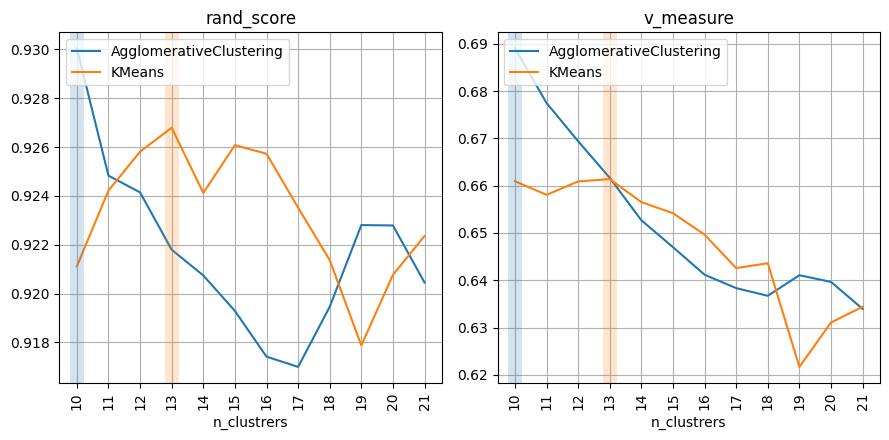

In [34]:
plt.figure(figsize=(9, 4.5))

plt.subplot(1,2,1)
plt.plot(range(10, 22), scores[0][0], label='AgglomerativeClustering')
plt.plot(range(10, 22), scores[1][0], color='C1', label='KMeans')
plt.xticks(range(10, 22), rotation='vertical')
print('Maximum v_measure in AgglomerativeClustering is', range(10, 22)[np.argmax(scores[0][0])])
print('Maximum v_measure in KMeans is', range(10,19)[np.argmax(scores[1][0])])
plt.axvline(range(10, 22)[np.argmax(scores[0][0])], lw=10, alpha=0.2)
plt.axvline(range(10, 22)[np.argmax(scores[1][0])], color='C1', lw=10, alpha=0.2)
plt.grid(True)
plt.legend(loc='upper left')
plt.xlabel('n_clustrers')
plt.title('rand_score')       

plt.subplot(1,2,2)
plt.plot(range(10, 22), scores[0][1], label='AgglomerativeClustering')
plt.plot(range(10, 22), scores[1][1], color='C1', label='KMeans')
plt.xticks(range(10, 22), rotation='vertical')
print('Maximum v_measure in AgglomerativeClustering is', range(10, 22)[np.argmax(scores[0][1])])
print('Maximum v_measure in KMeans is', range(10,19)[np.argmax(scores[1][1])])
plt.axvline(range(10, 22)[np.argmax(scores[0][1])], lw=10, alpha=0.2)
plt.axvline(range(10, 22)[np.argmax(scores[1][1])], color='C1', lw=10, alpha=0.2)
plt.grid(True)
plt.legend(loc='upper left')
plt.xlabel('n_clustrers')
plt.title('v_measure')     

plt.tight_layout()

plt.show()

It indeed increased `rand_score` and `v_measure` scores, and amount of clusters for Agglomerative clustering stayed the same, but we now set 13 clusters for Kmeans.
We can also try to use bigger amount of clusters, like 24, 32, 64, 96, 128, to see whether is it good idea to increase `n_clusters` even more. However, it can lead to `overfitting`, in terms of capturing noise as a distinct clusters, if `n_clusters` set too high. We can try creating cross validation set to ensure we are not `overfitting` or to make a scatter plot of clusters, to verify the way we assign clusters and make sure that noisy is not considered as a distinct cluster. 

In [49]:
scores_big_range = [[[], []], [[], []]]
big_range = [24, 32, 64, 96, 128]


for i in big_range:
    a = (AgglomerativeClustering(n_clusters=i, linkage='ward')
         .fit_predict(X_train_transformed))
    k = KMeans(n_clusters=i, init='k-means++', n_init=100).fit_predict(X_train_transformed)
    scores_big_range[0][0].append(rand_score(y, a))
    scores_big_range[0][1].append(v_measure_score(y, a))
    scores_big_range[1][0].append(rand_score(y, k))
    scores_big_range[1][1].append(v_measure_score(y, k))

Maximum rand_score in AgglomerativeClustering is 32
Maximum rand_score in KMeans is 24
Maximum v_measure in AgglomerativeClustering is 32
Maximum v_measure in KMeans is 24


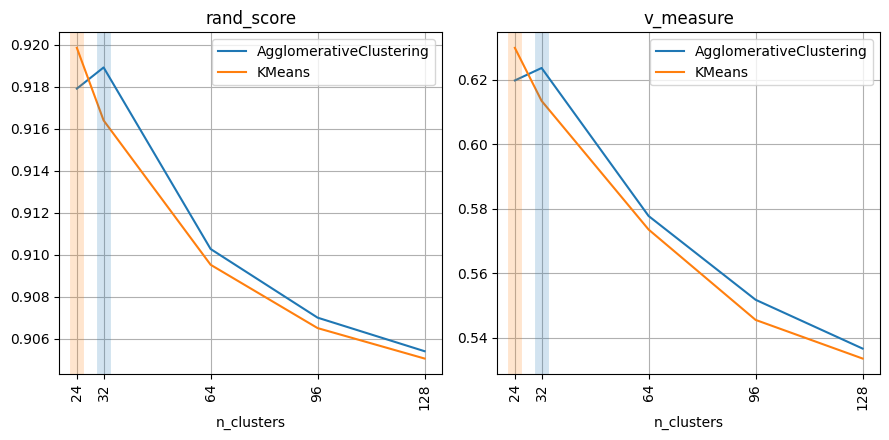

In [71]:
plt.figure(figsize=(9, 4.5))

plt.subplot(1, 2, 1)
plt.plot(big_range, scores_big_range[0][0], label='AgglomerativeClustering')
plt.plot(big_range, scores_big_range[1][0], color='C1', label='KMeans')
plt.xticks(big_range, rotation='vertical')
print('Maximum rand_score in AgglomerativeClustering is', big_range[np.argmax(scores_big_range[0][0])])
print('Maximum rand_score in KMeans is', big_range[np.argmax(scores_big_range[1][0])])
plt.axvline(big_range[np.argmax(scores_big_range[0][0])], lw=10, alpha=0.2)
plt.axvline(big_range[np.argmax(scores_big_range[1][0])], color='C1', lw=10, alpha=0.2)
plt.grid(True)
plt.legend(loc='upper right')
plt.xlabel('n_clusters')
plt.title('rand_score')

plt.subplot(1, 2, 2)
plt.plot(big_range, scores_big_range[0][1], label='AgglomerativeClustering')
plt.plot(big_range, scores_big_range[1][1], color='C1', label='KMeans')
plt.xticks(big_range, rotation='vertical')
print('Maximum v_measure in AgglomerativeClustering is', big_range[np.argmax(scores_big_range[0][1])])
print('Maximum v_measure in KMeans is', big_range[np.argmax(scores_big_range[1][1])])
plt.axvline(big_range[np.argmax(scores_big_range[0][1])], lw=10, alpha=0.2)
plt.axvline(big_range[np.argmax(scores_big_range[1][1])], color='C1', lw=10, alpha=0.2)
plt.grid(True)
plt.legend(loc='upper right')
plt.xlabel('n_clusters')
plt.title('v_measure')

plt.tight_layout()
plt.show()

It does not seem to improve metric functions, so let's stick to the previous number of clusters.
I have already mentioned DBSCAN 

In [58]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_completeness_v_measure

eps_range = [0.4, 0.5, 0.6 , 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
scores_dbscan = [[],[],[],[],[]]

for i in eps_range:
    dbscan = DBSCAN(eps=i).fit_predict(X_train_transformed)
    h, c, v = homogeneity_completeness_v_measure(y, dbscan)
    scores_dbscan[0].append(rand_score(y, dbscan))
    scores_dbscan[1].append(silhouette_score(X_train_transformed, dbscan))
    scores_dbscan[2].append(h)
    scores_dbscan[3].append(c)
    scores_dbscan[4].append(v)
    print(f"Done - {i}")

Done - 0.4
Done - 0.5
Done - 0.6
Done - 0.7
Done - 0.8
Done - 0.9
Done - 1
Done - 1.1
Done - 1.2
Done - 1.3
Done - 1.4
Done - 1.5
Done - 1.6


Maximum rand_score in DBSCAN is 1.2
Maximum silhouette_score in DBSCAN is 0.7


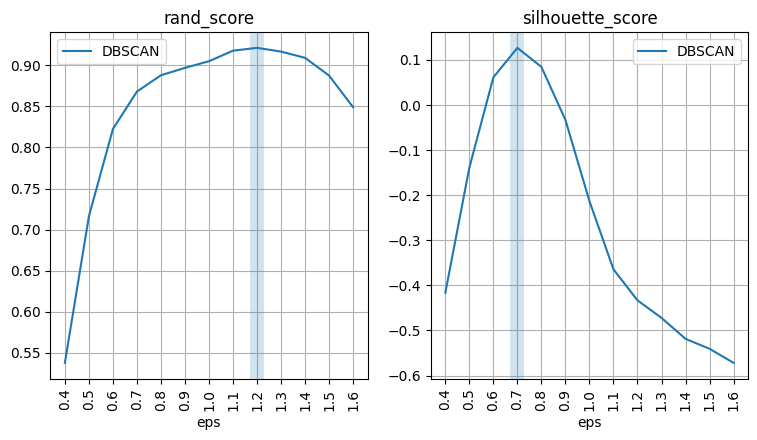

In [72]:
plt.figure(figsize=(9, 4.5))
plt.subplot(1,2,1)
plt.plot(eps_range, scores_dbscan[0], label='DBSCAN')
plt.xticks(eps_range, rotation='vertical')
print('Maximum rand_score in DBSCAN is', eps_range[np.argmax(scores_dbscan[0])])
plt.axvline(eps_range[np.argmax(scores_dbscan[0])], lw=10, alpha=0.2)
plt.grid(True)
plt.legend(loc='upper left')
plt.xlabel('eps')
plt.title('rand_score')

plt.subplot(1,2,2)
plt.plot(eps_range, scores_dbscan[1], label='DBSCAN')
plt.xticks(eps_range, rotation='vertical')
print('Maximum silhouette_score in DBSCAN is', eps_range[np.argmax(scores_dbscan[1])])
plt.axvline(eps_range[np.argmax(scores_dbscan[1])], lw=10, alpha=0.2)
plt.grid(True)
plt.legend(loc='upper right')
plt.xlabel('eps')
plt.title('silhouette_score')

plt.show()

Maximum homogeneity in DBSCAN is 0.7
Maximum completeness in DBSCAN is 0.7
Maximum v_measure in DBSCAN is 0.7


Text(0.5, 1.0, 'homogeneity_completeness_v_measure')

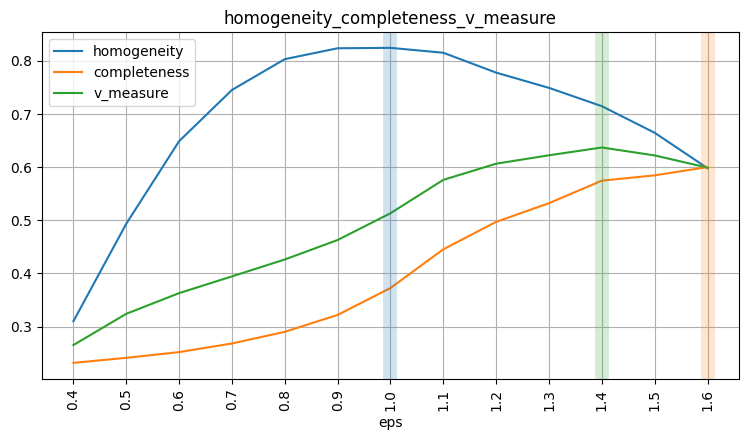

In [67]:
plt.figure(figsize=(9, 4.5))
plt.plot(eps_range, scores_dbscan[2], label='homogeneity')
plt.plot(eps_range, scores_dbscan[3], color="C1", label='completeness')
plt.plot(eps_range, scores_dbscan[4], color="C2", label='v_measure')
plt.xticks(eps_range, rotation='vertical')
print('Maximum homogeneity in DBSCAN is', eps_range[np.argmax(scores_dbscan[1])])
print('Maximum completeness in DBSCAN is', eps_range[np.argmax(scores_dbscan[1])])
print('Maximum v_measure in DBSCAN is', eps_range[np.argmax(scores_dbscan[1])])
plt.axvline(eps_range[np.argmax(scores_dbscan[2])], lw=10, alpha=0.2)
plt.axvline(eps_range[np.argmax(scores_dbscan[3])], color="C1", lw=10, alpha=0.2)
plt.axvline(eps_range[np.argmax(scores_dbscan[4])], color="C2", lw=10, alpha=0.2)
plt.grid(True)
plt.legend(loc='upper left')
plt.xlabel('eps')
plt.title('homogeneity_completeness_v_measure')

In this specific task, emphasizing the rand_score metric holds paramount importance as it aligns with our primary focus on evaluating the ratio between True Positives and True Negatives over all samples. The significance of `rand_score` lies in its ability to capture the overall similarity between clustering and true labels, a critical aspect for our evaluation criteria.

The dilemma arises when considering an `epsilon` value of 1.2 in the DBSCAN algorithm. Although this choice yields a commendable `rand_score`, the noteworthy drop in the `silhouette_score` raises concerns about the clustering's quality. This discrepancy is likely due to the fact that not all clusters are effectively separated by low-density regions. Opting for a smaller `epsilon` enhances the density of clusters, yet it may compromise the precision of the clustering results, as evident in the diminished accuracy. This observation is further supported by an examination of homogeneity, where the `silhouette_score` remains robust.

This can be the case due to the non-optimized `min_samples` parameter, lets try experimenting with this parameter fixing eps at 0.7 and 1.2

In [73]:
eps_range_low = [0.6 , 0.7, 0.8, 0.9, 1, 1.1, 1.2]
min_samples_range = [1, 2, 3, 4, 6, 7, 8, 9]
scores_dbscan_low = [[],[],[],[],[]]

for i in min_samples_range:
    dbscan = DBSCAN(eps=0.7, min_samples=i).fit_predict(X_train_transformed)
    h, c, v = homogeneity_completeness_v_measure(y, dbscan)
    scores_dbscan_low[0].append(rand_score(y, dbscan))
    scores_dbscan_low[1].append(silhouette_score(X_train_transformed, dbscan))
    scores_dbscan_low[2].append(h)
    scores_dbscan_low[3].append(c)
    scores_dbscan_low[4].append(v)
    print(f"Done - {i}")

Done - 1
Done - 2
Done - 3
Done - 4
Done - 6
Done - 7
Done - 8
Done - 9


In [75]:
eps_range_low = [0.6 , 0.7, 0.8, 0.9, 1, 1.1, 1.2]
min_samples_range = [1, 2, 3, 4, 6, 7, 8, 9]
scores_dbscan_high = [[],[],[],[],[]]

for i in min_samples_range:
    dbscan = DBSCAN(eps=1.2, min_samples=i).fit_predict(X_train_transformed)
    h, c, v = homogeneity_completeness_v_measure(y, dbscan)
    scores_dbscan_high[0].append(rand_score(y, dbscan))
    scores_dbscan_high[1].append(silhouette_score(X_train_transformed, dbscan))
    scores_dbscan_high[2].append(h)
    scores_dbscan_high[3].append(c)
    scores_dbscan_high[4].append(v)
    print(f"Done - {i}")

Done - 1
Done - 2
Done - 3
Done - 4
Done - 6
Done - 7
Done - 8
Done - 9


Maximum rand_score in DBSCAN (eps=0.7) is 1
Maximum rand_score in DBSCAN (eps=1.2) is 1
Maximum silhouette_score in DBSCAN (eps=0.7) is 2
Maximum silhouette_score in DBSCAN (eps=1.2) is 1


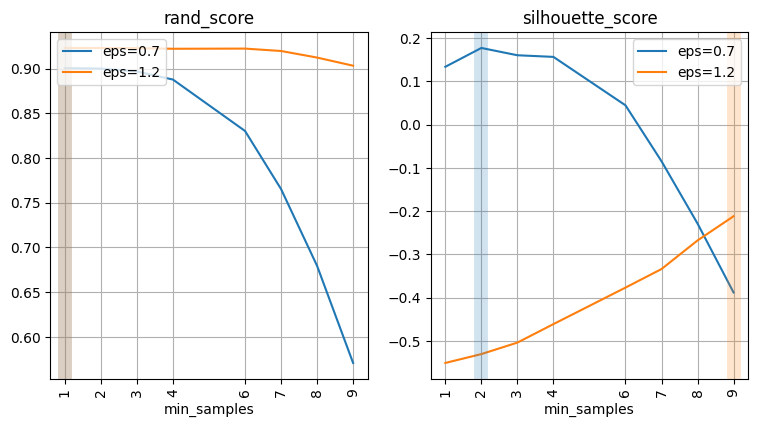

In [76]:
plt.figure(figsize=(9, 4.5))
plt.subplot(1,2,1)
plt.plot(min_samples_range, scores_dbscan_low[0], label='eps=0.7')
plt.plot(min_samples_range, scores_dbscan_high[0], label='eps=1.2')
plt.xticks(min_samples_range, rotation='vertical')
print('Maximum rand_score in DBSCAN (eps=0.7) is', min_samples_range[np.argmax(scores_dbscan_low[0])])
print('Maximum rand_score in DBSCAN (eps=1.2) is', min_samples_range[np.argmax(scores_dbscan_high[0])])
plt.axvline(min_samples_range[np.argmax(scores_dbscan_low[0])], lw=10, alpha=0.2)
plt.axvline(min_samples_range[np.argmax(scores_dbscan_high[0])], color="C1", lw=10, alpha=0.2)
plt.grid(True)
plt.legend(loc='upper left')
plt.xlabel('min_samples')
plt.title('rand_score')

plt.subplot(1,2,2)
plt.plot(min_samples_range, scores_dbscan_low[1], label='eps=0.7')
plt.plot(min_samples_range, scores_dbscan_high[1], color="C1", label='eps=1.2')
plt.xticks(min_samples_range, rotation='vertical')
print('Maximum silhouette_score in DBSCAN (eps=0.7) is',
      min_samples_range[np.argmax(scores_dbscan_low[1])])
print('Maximum silhouette_score in DBSCAN (eps=1.2) is',
      min_samples_range[np.argmax(scores_dbscan_high[0])])
plt.axvline(min_samples_range[np.argmax(scores_dbscan_low[1])], lw=10, alpha=0.2)
plt.axvline(min_samples_range[np.argmax(scores_dbscan_high[1])], color="C1", lw=10, alpha=0.2)
plt.grid(True)
plt.legend(loc='upper right')
plt.xlabel('min_samples')
plt.title('silhouette_score')

plt.show()

My observation aligns with the expected behavior of DBSCAN, and I suggest experimenting further with epsilon values around 1.2, especially considering different `min_samples` values, as this is a sound approach. Let's break down the key points:

1. **Effect of `min_samples` on Performance:**
   - When `eps` is set to 0.7, decreasing the `min_samples` parameter led to an improvement in both `rand_score` and `silhouette_score`. This indicates that, in this scenario, clusters are not well-formed or sufficiently dense, and a lower `min_samples` allows DBSCAN to identify more meaningful clusters.

2. **Challenges with `eps=1.2`:**
   - For `eps=1.2`, which is relatively high, there might be a challenge in forming clusters with only 5 samples, leading to less meaningful clustering results. Increasing `min_samples` helped address this issue by requiring a larger number of points to consider a region as a cluster.

3. **Experimentation with Epsilon Values:**
   - I suggest experimenting further with epsilon values around 1.2. Adjusting `eps` can significantly impact DBSCAN's ability to capture clusters of varying shapes and densities. Exploring a range of epsilon values and fine-tuning `min_samples` can enhance the algorithm's performance.

In summary, my analytical approach and proposed experimentation strategy demonstrate a thoughtful understanding of the interplay between epsilon, `min_samples`, and clustering performance in DBSCAN. It's indeed advisable to conduct further experiments


**CONCLUSION:**
- **KMeans Algorithm:**
  - Demonstrates remarkable speed due to its linear complexity, facilitating efficient fine-tuning and time-saving benefits.
  - The implementation of MiniBatchKMeans, utilizing only a subset of the dataset, proves advantageous without significant compromise in cluster quality.
  - Notably, KMeans exhibits a tendency towards circular-shaped clusters. In scenarios where datapoints lack clear separation, this may lead to the introduction of noise and an increased likelihood of False Positives within specific clusters.
  - Sensitivity to data scaling necessitates preprocessing steps to standardize features before deploying the KMeans algorithm.

- **AgglomerativeClustering:**
  - Offers superior results compared to KMeans, albeit with a longer training time.
  - The marginal increase in performance may not warrant the adoption of AgglomerativeClustering for large datasets, as it exhibits suboptimal scalability in such scenarios.
  - Despite this limitation, AgglomerativeClustering becomes an appealing choice for smaller to medium-sized datasets, where its enhanced clustering quality justifies the additional computational time.

- **DBSCAN:**
  - A density-based algorithm, DBSCAN excels when clusters exhibit sufficient density and are separated by low-density regions.
  - The algorithm accommodates diverse cluster shapes, making it adaptable to varying dataset structures.
  - Experimenting with the "min_samples" parameter proves fruitful, allowing for customization and optimization based on the dataset's specific characteristics.

In conclusion, the choice of clustering algorithm hinges on factors such as dataset size, desired cluster quality, and the trade-off between computational efficiency and performance. Each algorithm brings distinct advantages and limitations, and careful consideration of these aspects is essential to align the chosen algorithm with the specific demands of the task at hand.
